<a href="https://colab.research.google.com/github/Akkupawar/Major-Project/blob/main/MajorProject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Major Project**

**Corona Data visualization.**

1. Processing The Data
2. Plotting of Total Cases vs Total Recovered for India and USA
3. Comparison of Deaths.
4. Forcasting for Cases in INDIA 


**Corona Data visualization.**

1. Processing The Data

In [47]:
import numpy as np
import pandas as pd
import io
import requests
import matplotlib.pyplot as plt
df = pd.read_csv('/content/drive/MyDrive/MajorProject/owid-covid-data.csv') #importing data
df

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,new_tests,total_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,tests_per_case,tests_units,total_vaccinations,people_vaccinated,people_fully_vaccinated,new_vaccinations,new_vaccinations_smoothed,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,new_vaccinations_smoothed_per_million,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
0,AFG,Asia,Afghanistan,2020-02-24,1.0,1.0,NaN,NaN,NaN,NaN,0.026,0.026,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511
1,AFG,Asia,Afghanistan,2020-02-25,1.0,0.0,NaN,NaN,NaN,NaN,0.026,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511
2,AFG,Asia,Afghanistan,2020-02-26,1.0,0.0,NaN,NaN,NaN,NaN,0.026,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511
3,AFG,Asia,Afghanistan,2020-02-27,1.0,0.0,NaN,NaN,NaN,NaN,0.026,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511
4,AFG,Asia,Afghanistan,2020-02-28,1.0,0.0,NaN,NaN,NaN,NaN,0.026,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79272,ZWE,Africa,Zimbabwe,2021-03-30,36839.0,0.0,17.429,1520.0,0.0,0.571,2478.583,0.000,1.173,102.268,0.000,0.038,0.80,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2675.0,435853.0,29.325,0.180,2248.0,0.151,0.008,129.0,tests performed,85866.0,72944.0,12922.0,4256.0,5810.0,0.58,0.49,0.09,391.0,NaN,14862927.0,42.729,19.6,2.822,1.882,1899.775,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0.571
79273,ZWE,Africa,Zimbabwe,2021-03-31,36882.0,43.0,19.000,1523.0,3.0,1.000,2481.476,2.893,1.278,102.470,0.202,0.067,0.81,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1440.0,437293.0,29.422,0.097,1951.0,0.131,0.010,102.7,tests performed,91880.0,76995.0,14885.0,6014.0,5712.0,0.62,0.52,0.10,384.0,NaN,14862927.0,42.729,19.6,2.822,1.882,1899.775,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0.571
79274,ZWE,Africa,Zimbabwe,2021-04-01,36896.0,14.0,16.857,1523.0,0.0,0.714,2482.418,0.942,1.134,102.470,0.000,0.048,0.81,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2337.0,439630.0,29.579,0.157,2012.0,0.135,0.008,119.4,tests performed,105307.0,87791.0,17516.0,13427.0,6617.0,0.71,0.59,0.12,445.0,NaN,14862927.0,42.729,19.6,2.822,1.882,1899.775,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0.571
792

In [48]:
#Taking Required Number of Columns
df=df[['iso_code','location','date','total_cases','total_deaths','new_cases']]
df = df.rename(columns={'iso_code':'iso','date':'ds'})

In [49]:
df.isnull().sum()
df=df.dropna() #dropping Null Values fron dataframe(df)

df['ds'] = pd.to_datetime(df['ds']) #

#Converting Columns  Values to int/str
df['iso']=df['iso'].apply(str)
df['total_cases'] = df['total_cases'].astype(int)
df['total_deaths'] = df['total_deaths'].astype(int)
df['new_cases'] = df['new_cases'].astype(int)
df

,iso,location,ds,total_cases,total_deaths,new_cases
27,AFG,Afghanistan,2020-03-22,34,1,4
28,AFG,Afghanistan,2020-03-23,41,1,7
29,AFG,Afghanistan,2020-03-24,43,1,2
30,AFG,Afghanistan,2020-03-25,76,2,33
31,AFG,Afghanistan,2020-03-26,80,3,4
...,...,...,...,...,...,...
79272,ZWE,Zimbabwe,2021-03-30,36839,1520,0
79273,ZWE,Zimbabwe,2021-03-31,36882,1523,43
79274,ZWE,Zimbabwe,2021-04-01,36896,1523,14
79275,ZWE,Zimbabwe,2021-04-02,36903,1524,7


In [50]:
df = df.set_index("iso")

In [51]:
df

,location,ds,total_cases,total_deaths,new_cases
iso,,,,,
AFG,Afghanistan,2020-03-22,34,1,4
AFG,Afghanistan,2020-03-23,41,1,7
AFG,Afghanistan,2020-03-24,43,1,2
AFG,Afghanistan,2020-03-25,76,2,33
AFG,Afghanistan,2020-03-26,80,3,4
...,...,...,...,...,...
ZWE,Zimbabwe,2021-03-30,36839,1520,0
ZWE,Zimbabwe,2021-03-31,36882,1523,43
ZWE,Zimbabwe,2021-04-01,36896,1523,14


In [52]:
#Dropping Unwanted Rows

df.drop(['OWID_WRL','OWID_AFR','OWID_SAM','OWID_OCE','OWID_NAM','OWID_EUN','OWID_EUR','OWID_ASI','OWID_INT','OWID_KOS'],axis=00,inplace=True)
#df.drop('OWID_AFR',inplace=True)

In [53]:
df=df.reset_index()
df

,iso,location,ds,total_cases,total_deaths,new_cases
0,AFG,Afghanistan,2020-03-22,34,1,4
1,AFG,Afghanistan,2020-03-23,41,1,7
2,AFG,Afghanistan,2020-03-24,43,1,2
3,AFG,Afghanistan,2020-03-25,76,2,33
4,AFG,Afghanistan,2020-03-26,80,3,4
...,...,...,...,...,...,...
64189,ZWE,Zimbabwe,2021-03-30,36839,1520,0
64190,ZWE,Zimbabwe,2021-03-31,36882,1523,43
64191,ZWE,Zimbabwe,2021-04-01,36896,1523,14
64192,ZWE,Zimbabwe,2021-04-02,36903,1524,7


# **NOTE :** Below 2 Calculation are done because we don't have those columns we required to plot the graphs.

In [54]:
#removing deaths and new cases from total cases (We got Cases which are alive or recovered) 
#I assume by below calculation will give us recovered Cases. 
 
df['total_recover'] = df['total_cases'] - df['total_deaths']- df['new_cases']
df

,iso,location,ds,total_cases,total_deaths,new_cases,total_recover
0,AFG,Afghanistan,2020-03-22,34,1,4,29
1,AFG,Afghanistan,2020-03-23,41,1,7,33
2,AFG,Afghanistan,2020-03-24,43,1,2,40
3,AFG,Afghanistan,2020-03-25,76,2,33,41
4,AFG,Afghanistan,2020-03-26,80,3,4,73
...,...,...,...,...,...,...,...
64189,ZWE,Zimbabwe,2021-03-30,36839,1520,0,35319
64190,ZWE,Zimbabwe,2021-03-31,36882,1523,43,35316
64191,ZWE,Zimbabwe,2021-04-01,36896,1523,14,35359
64192,ZWE,Zimbabwe,2021-04-02,36903,1524,7,35372


In [55]:
#I assume by below calculation will give us Active Cases which is same as New Cases. 
df['active_cases'] = df['total_cases']- df['total_recover']-df['total_deaths'] 
df

,iso,location,ds,total_cases,total_deaths,new_cases,total_recover,active_cases
0,AFG,Afghanistan,2020-03-22,34,1,4,29,4
1,AFG,Afghanistan,2020-03-23,41,1,7,33,7
2,AFG,Afghanistan,2020-03-24,43,1,2,40,2
3,AFG,Afghanistan,2020-03-25,76,2,33,41,33
4,AFG,Afghanistan,2020-03-26,80,3,4,73,4
...,...,...,...,...,...,...,...,...
64189,ZWE,Zimbabwe,2021-03-30,36839,1520,0,35319,0
64190,ZWE,Zimbabwe,2021-03-31,36882,1523,43,35316,43
64191,ZWE,Zimbabwe,2021-04-01,36896,1523,14,35359,14
64192,ZWE,Zimbabwe,2021-04-02,36903,1524,7,35372,7


In [56]:
# Getting Data of INDIA and USA in one Data frame
df_ind=df.loc[(df['iso'] == 'IND')]
df_usa=df.loc[(df['iso'] == 'USA')]
df_new = pd.concat([df_ind, df_usa])
df_new=df_new.reset_index()
df_new

,index,iso,location,ds,total_cases,total_deaths,new_cases,total_recover,active_cases
0,26839,IND,India,2020-03-11,62,1,6,55,6
1,26840,IND,India,2020-03-12,73,1,11,61,11
2,26841,IND,India,2020-03-13,82,2,9,71,9
3,26842,IND,India,2020-03-14,102,2,20,80,20
4,26843,IND,India,2020-03-15,113,2,11,100,11
...,...,...,...,...,...,...,...,...,...
784,61741,USA,United States,2021-03-30,30393805,550996,61240,29781569,61240
785,61742,USA,United States,2021-03-31,30460834,552072,67029,29841733,67029
786,61743,USA,United States,2021-04-01,30539868,553136,79034,29907698,79034
787,61744,USA,United States,2021-04-02,30609690,554103,69822,29985765,69822


In [57]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 789 entries, 0 to 788
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   index          789 non-null    int64         
 1   iso            789 non-null    object        
 2   location       789 non-null    object        
 3   ds             789 non-null    datetime64[ns]
 4   total_cases    789 non-null    int64         
 5   total_deaths   789 non-null    int64         
 6   new_cases      789 non-null    int64         
 7   total_recover  789 non-null    int64         
 8   active_cases   789 non-null    int64         
dtypes: datetime64[ns](1), int64(6), object(2)
memory usage: 55.6+ KB


In [58]:
def plot_var(var='total_recover',
             iso='IND'):

    assert type(var)==str
    assert type(iso)==str
 
    y = df_new[df_new['iso']==iso][var]
    x = df_new[df_new['iso']==iso]['ds']
    plt.figure(figsize=(12,4))
    plt.title("Plot of \"{}\" for {}".format(var,iso),fontsize=18)
    plt.bar(x=x,height=y,edgecolor='k',color='orange')
    plt.grid(True)
    plt.xticks(fontsize=14,rotation=45)
    plt.yticks(fontsize=14)
    plt.show()

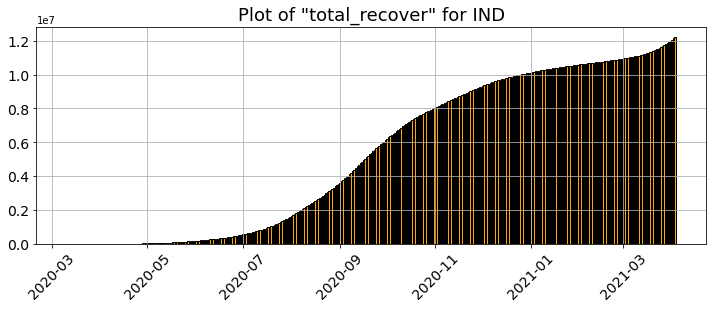

In [59]:
#Plotting of Total Cases for INDIA using Bar Graph
plot_var()

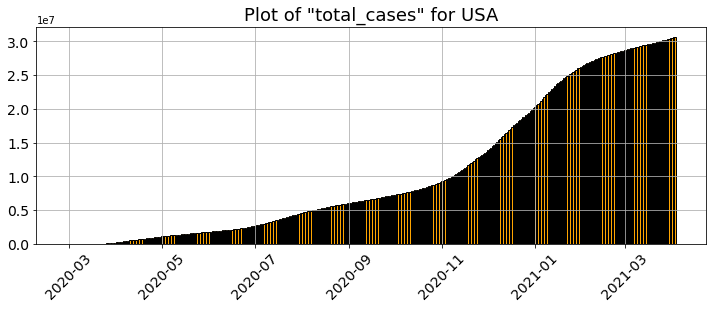

In [60]:
#Plotting of Total Cases for USA using Bar Graph
plot_var('total_cases','USA')

**Corona Data visualization.**

2. Plotting of Total Cases vs Total Recovered for India and USA

In [61]:
#Plotting of Total Cases vs Total Recovered for India and USA using Scatter Plot
def plot_xy(varx='active_cases',
            vary='total_recover',
            iso='IND',
            iso1='USA'):
   
    assert type(varx)==str
    assert type(vary)==str 
    
    x = df_new[df_new['iso']==iso][varx]
    y = df_new[df_new['iso']==iso][vary]
    x1 = df_new[df_new['iso']==iso1][varx]
    y1 = df_new[df_new['iso']==iso1][vary]
    
    if (x.nunique()!=1) and (y.nunique()!=1):
        plt.figure(figsize=(15,5))
        plt.title("Plot of Active Cases vs Total Recovered for India and USA ",fontsize=18)
        plt.scatter(x=x,y=y,edgecolor='k',color='lightgreen',s=100)
        plt.scatter(x=x1,y=y1,edgecolor='b',color='r',s=100)
        plt.grid(True)
        plt.xticks(fontsize=14,rotation=45)
        plt.yticks(fontsize=14)
        plt.xlabel("Active Cases",fontsize=16)
        plt.ylabel("Total Recovered",fontsize=16)
        plt.show()
    else:
        print("Some of the data unavailable for a scatter plot. Sorry!")

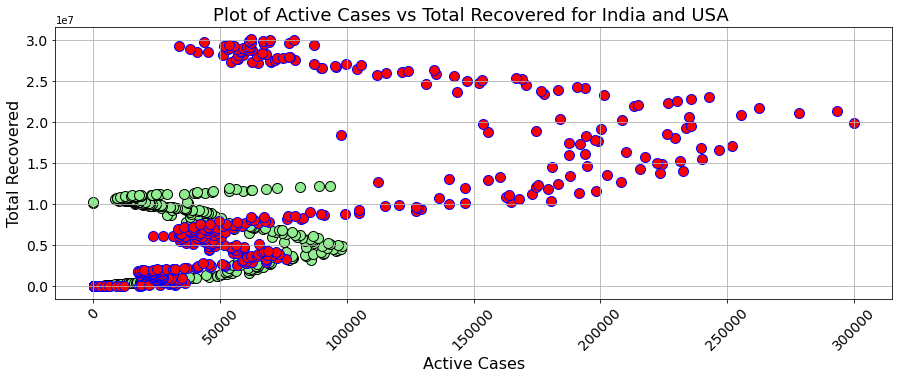

In [62]:
plot_xy(iso='IND',iso1='USA')

In [63]:
#Plotting of Total Recovered Result for India and USA using Line Plot
def plotTesting(iso=['IND','USA']):
    
    legends = []
    plt.figure(figsize=(14,5))
    plt.title("Total Recovered results",fontsize=18)
    for s in iso:
        data = np.array(df_new[df_new['iso']==s]['total_recover'])[-1::-1]
        slope = int((data[-1]-data[0])/len(data))
        plt.plot(data,linewidth=2)
        plt.text(x=len(data)-2,y=data[-1]*1.05,s=s,fontsize=14)
        legends.append(str(slope)+" recovered/day in " + s)
    plt.legend(legends,fontsize=14)
    plt.grid(True)
    plt.xlim(0,len(data)+2)
    plt.xticks(fontsize=16)
    plt.yticks(fontsize=16)
    plt.xlabel("Days",fontsize=16)
    plt.ylabel("Total test results",fontsize=16)
    plt.show()

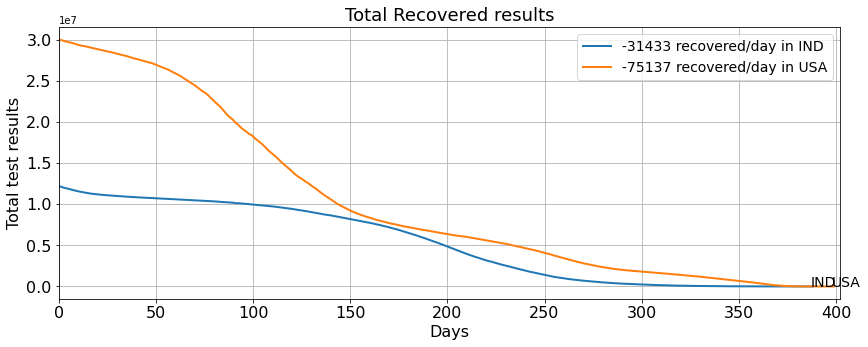

In [64]:
plotTesting()

In [65]:
#Plotting of Total Cases vs Total Recovered for India and USA using Line Plot
def plot(iso=['IND','USA']):
    
    legends = []
    plt.figure(figsize=(14,5))
    plt.title("Active Cases vs Total Recovered",fontsize=18)
    for s in iso:
        data = np.array(df_new[df_new['iso']==s]['total_recover'])[-1::-1]      
        slope = int((data[-1]-data[0])/len(data))        
        plt.plot(data,linewidth=2)        
        plt.text(x=len(data)-2,y=data[-1]*1.05,s=s,fontsize=14)
        legends.append(str(slope)+" recovered/day in " + s)

    for s1 in iso:    
        data1 = np.array(df_new[df_new['iso']==s1]['active_cases'])[-1::-1]
        slope1 = int((data1[-1]-data1[0])/len(data1))
        plt.plot(data1,linewidth=2)
        plt.text(x=len(data1)-2,y=data1[-1]*1.05,s=s1,fontsize=14)
        legends.append(str(slope1)+" cases/day in " + s1)
    plt.legend(legends,fontsize=14)
    plt.grid(True)
    plt.xlim(0,len(data)+2)
    plt.xlim(0,len(data1)+2)
    plt.xticks(fontsize=16)
    plt.yticks(fontsize=16)
    plt.xlabel("Days",fontsize=16)
    plt.ylabel("Total cases vs Total Recovered",fontsize=16)
    plt.show()

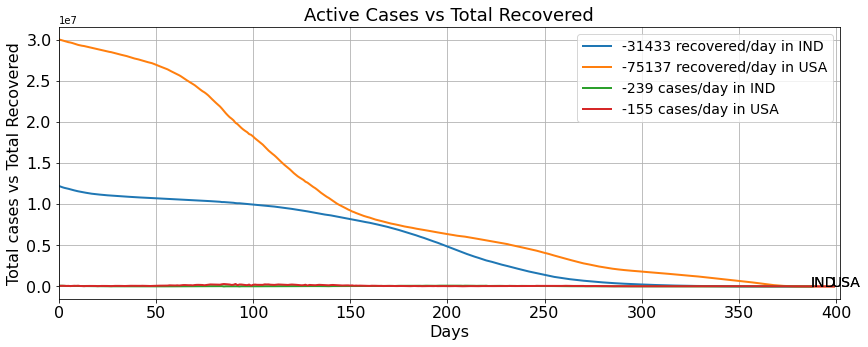

In [66]:
plot()

Corona Data visualization.

3. Comparison of Deaths in all the locations. 

Text(0, 0.5, 'Total Deaths')

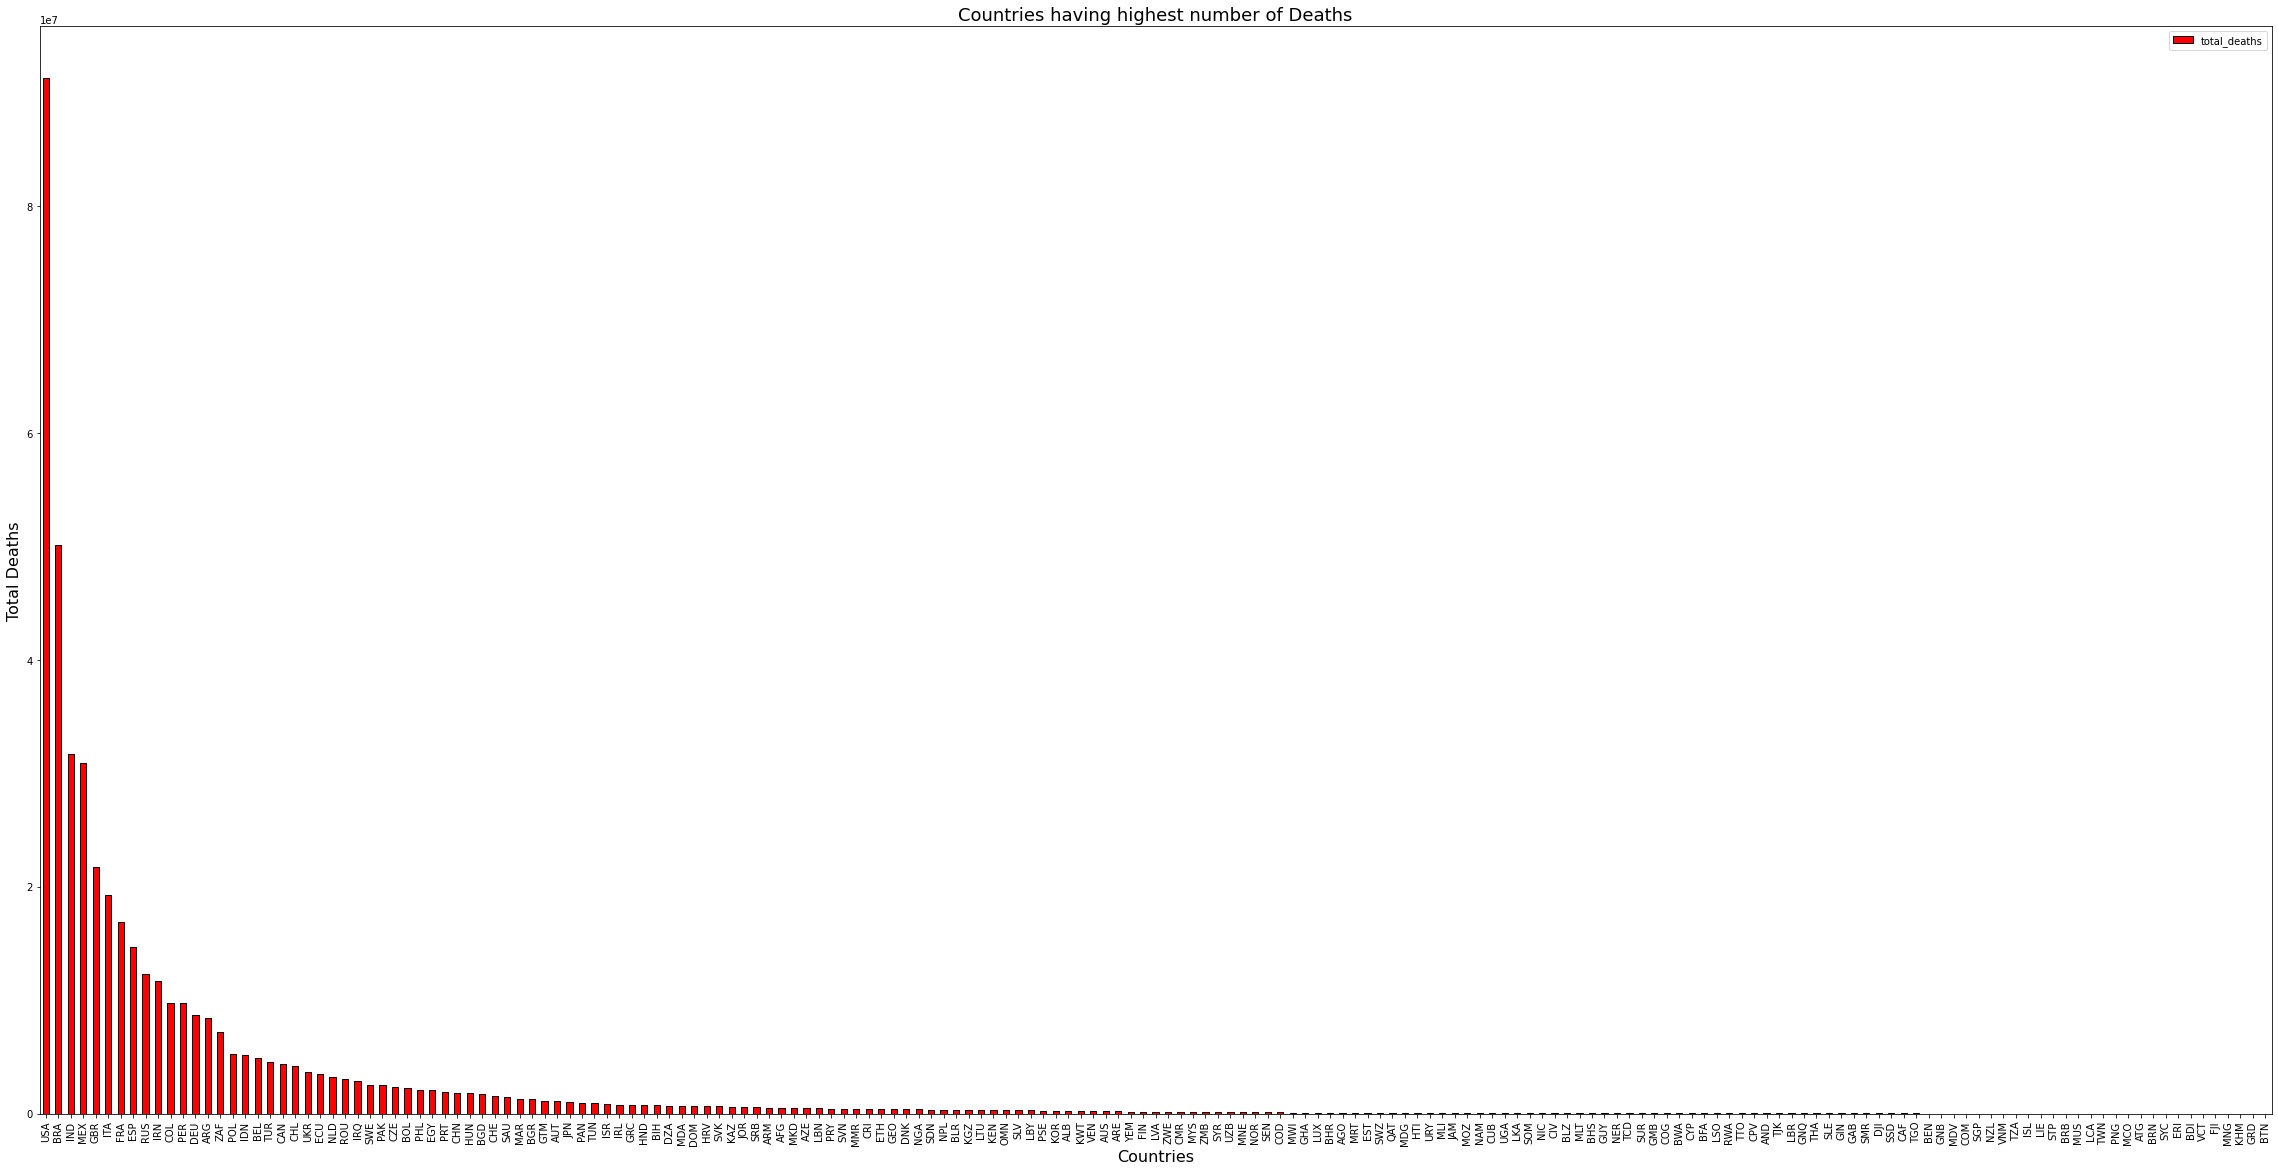

In [67]:
#TOTAL Countries with Worst Death Counts.
import numpy as np
import matplotlib.pyplot as plt

plot_data = df[['iso','total_deaths']]
plot_data =plot_data.groupby('iso').sum()

plot_data.sort_values(by='total_deaths',
                      axis=0,
                      ascending=False,
                      inplace=False,
                      kind='quicksort',
                      na_position='last').plot(kind='bar',color='r',edgecolor='black',figsize=(40,20))
plt.title("Countries having highest number of Deaths",fontsize=18)                    
plt.xlabel("Countries",fontsize=16)
plt.ylabel("Total Deaths",fontsize=16)

Text(0, 0.5, 'Total Deaths')

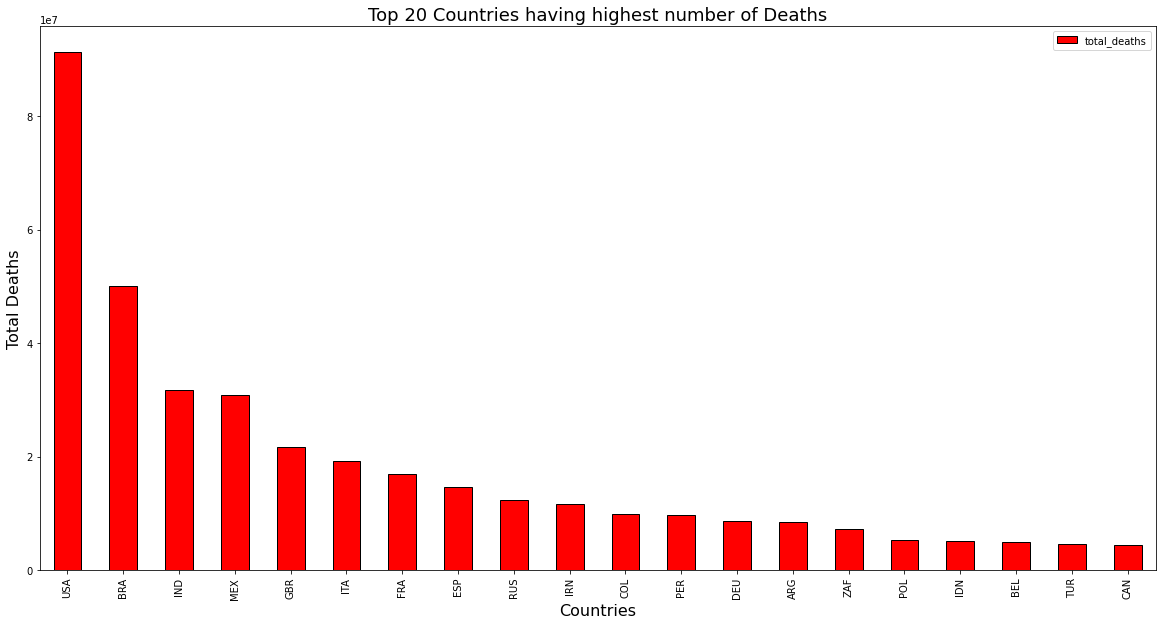

In [68]:
#TOP 20 Countries with Worst Death Counts.
test=plot_data.sort_values(by='total_deaths',
                      axis=0,
                      ascending=False,
                      inplace=False,
                      kind='quicksort',
                      na_position='last')
test.nlargest(20,'total_deaths').plot(kind='bar',color='r', edgecolor='black',figsize=(20,10))
plt.title("Top 20 Countries having highest number of Deaths",fontsize=18)
plt.xlabel("Countries",fontsize=16)
plt.ylabel("Total Deaths",fontsize=16)

**Corona Data visualization.**
4. FORCASTING INDIA for Total numbar of Cases

In [69]:
#Creating Data frame for forcasting
df_indf = df_ind[['ds','active_cases']]
df_indf = df_indf.rename(columns={'active_cases':'y'})
df_indf

,ds,y
26839,2020-03-11,6
26840,2020-03-12,11
26841,2020-03-13,9
26842,2020-03-14,20
26843,2020-03-15,11
...,...,...
27223,2021-03-30,53480
27224,2021-03-31,72330
27225,2021-04-01,81466
27226,2021-04-02,89129


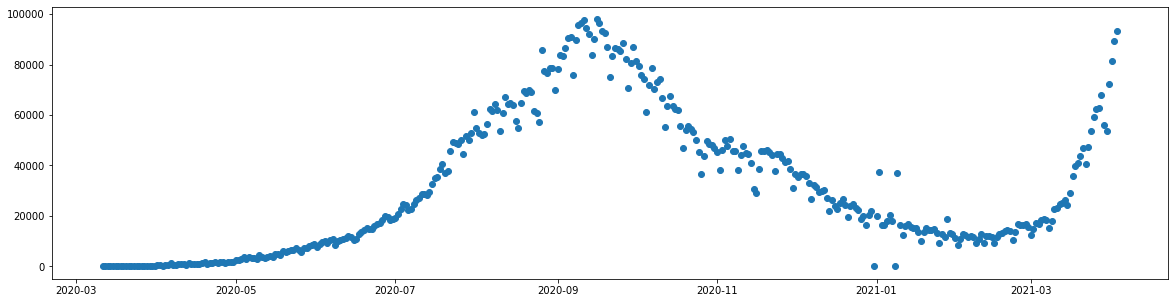

In [70]:
#forcasting
import matplotlib.pyplot as plt
plt.figure(figsize=(20,5))
plt.scatter(df_indf['ds'],df_indf['y'])
plt.show()

In [71]:
from fbprophet import Prophet

In [72]:
#using Prophet for Predicting
model = Prophet(changepoint_prior_scale=1)
# Overfit,Underfit and Bestfit
model.fit(df_indf)
forecast = model.make_future_dataframe(periods=1,freq='M')
forecast = model.predict(forecast)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [73]:
forecast[['ds','yhat','yhat_lower','yhat_upper']]

,ds,yhat,yhat_lower,yhat_upper
0,2020-03-11,787.384765,-8420.390525,9306.323062
1,2020-03-12,229.027787,-8062.829329,8537.666010
2,2020-03-13,665.540658,-8720.497638,8655.025718
3,2020-03-14,1622.045348,-7256.061674,10693.384132
4,2020-03-15,-1230.057344,-9440.729685,7471.982422
...,...,...,...,...
385,2021-03-31,49183.162741,41288.084133,57783.211946
386,2021-04-01,49167.064001,40714.124464,57654.704211
387,2021-04-02,50145.835110,41012.895157,58745.879959
388,2021-04-03,51644.598038,43140.792648,60580.601576


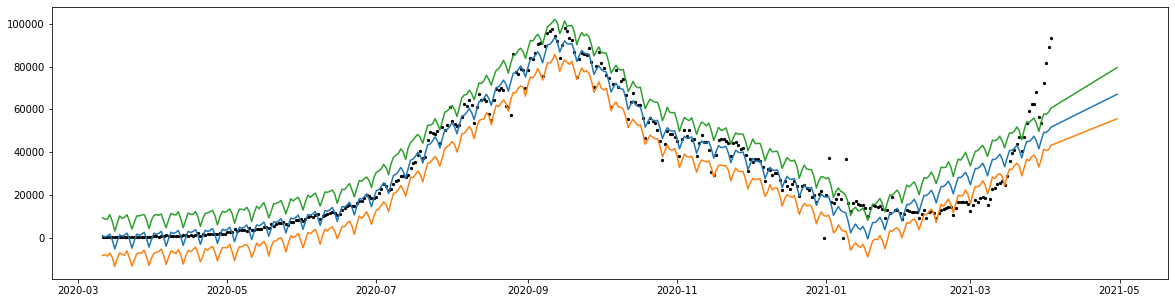

In [74]:
#Plotting the DATA
import matplotlib.pyplot as plt
plt.figure(figsize=(20,5))
plt.scatter(df_indf['ds'],df_indf['y'],s=5,c='k')
plt.plot(forecast['ds'],forecast['yhat'])
plt.plot(forecast['ds'],forecast['yhat_lower'])
plt.plot(forecast['ds'],forecast['yhat_upper'])
plt.show()

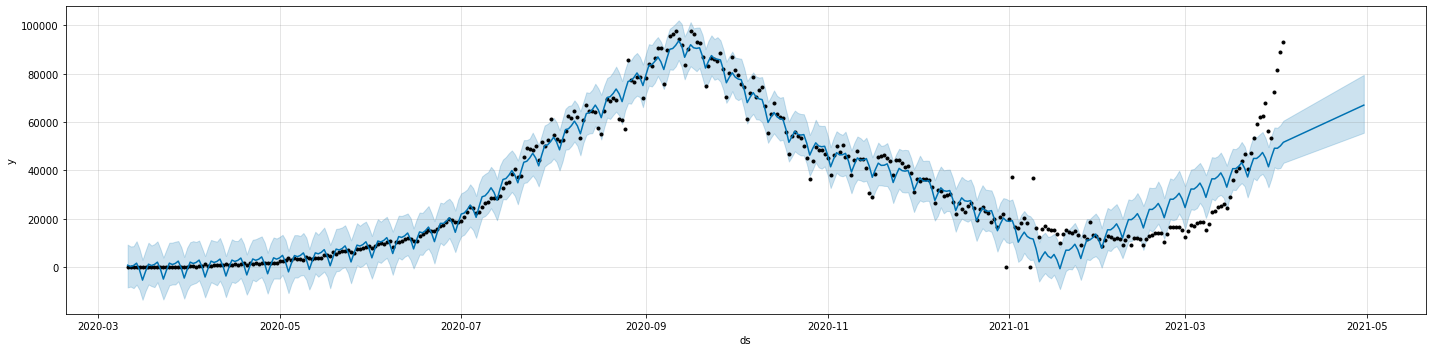

In [75]:

model.plot(forecast,figsize=(20,5));